In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import matplotlib.pyplot as plt
import scienceplots
plt.style.use('science')

In [2]:
FOLDER = "20250418"

ASSETS = "../assets/"+FOLDER+"/"
INPUT = "../input/"+FOLDER+"/"
OUTPUT = "../output/"+FOLDER+"/"

LINE_COLOR='#1B4244'

In [3]:

data = {
    'Release Date': ['2009-01', '2010-10', '2011-08', '2013-01', '2013-10', '2013-12', '2014-12', '2015-09', '2016-06', '2018-04', '2019-04', '2020-03', '2022-07', '2023-08'],
    'Miner Hardware (Manufacturer)': ['CPU Mining (Intel Core i5-650)', 'GPU – ATI Radeon HD 5870 (ATI)', 'FPGA – X6500 Miner (FPGA Mining LLC)', 'ASIC – AvalonMiner Batch 1 (Canaan)', 'ASIC – KnC Jupiter (KnCMiner)', 'ASIC – Antminer U1 USB (Bitmain)', 'ASIC – Antminer S5 (Bitmain)', 'ASIC – Antminer S7 (Bitmain)', 'ASIC – Antminer S9 (Bitmain)', 'ASIC – Antminer S15 (Bitmain)', 'ASIC – Antminer S17 (Bitmain)', 'ASIC – Antminer S19 Pro (Bitmain)', 'ASIC – Antminer S19 XP (Bitmain)', 'ASIC – Antminer S21 (Bitmain)'],
    'Efficiency (J/TH)': ['~5,000,000', '~264,550', '~43,000', '~9,351', '~1,500', '~1,250',  '~510', '~250', '~96', '~57', '~40', '~29.5', '~21', '~16–17.5']
}

miner_efficiency = pd.DataFrame(data)

# Convert 'Release Date' to datetime
miner_efficiency['Release Date'] = pd.to_datetime(miner_efficiency['Release Date'])

#Clean efficiency and convert it to numeric
miner_efficiency['Efficiency (J/TH)'] = miner_efficiency['Efficiency (J/TH)'].str.replace('~', '', regex=False)
miner_efficiency['Efficiency (J/TH)'] = miner_efficiency['Efficiency (J/TH)'].str.replace(',', '', regex=False)
miner_efficiency['Efficiency (J/TH)'] = miner_efficiency['Efficiency (J/TH)'].str.split('–').str[0] #handle range values
miner_efficiency['Efficiency (J/TH)'] = pd.to_numeric(miner_efficiency['Efficiency (J/TH)'], errors='coerce')

#Set 'Release Date' as index
miner_efficiency = miner_efficiency.set_index('Release Date')

print(miner_efficiency.to_markdown())

| Release Date        | Miner Hardware (Manufacturer)        |   Efficiency (J/TH) |
|:--------------------|:-------------------------------------|--------------------:|
| 2009-01-01 00:00:00 | CPU Mining (Intel Core i5-650)       |               5e+06 |
| 2010-10-01 00:00:00 | GPU – ATI Radeon HD 5870 (ATI)       |          264550     |
| 2011-08-01 00:00:00 | FPGA – X6500 Miner (FPGA Mining LLC) |           43000     |
| 2013-01-01 00:00:00 | ASIC – AvalonMiner Batch 1 (Canaan)  |            9351     |
| 2013-10-01 00:00:00 | ASIC – KnC Jupiter (KnCMiner)        |            1500     |
| 2013-12-01 00:00:00 | ASIC – Antminer U1 USB (Bitmain)     |            1250     |
| 2014-12-01 00:00:00 | ASIC – Antminer S5 (Bitmain)         |             510     |
| 2015-09-01 00:00:00 | ASIC – Antminer S7 (Bitmain)         |             250     |
| 2016-06-01 00:00:00 | ASIC – Antminer S9 (Bitmain)         |              96     |
| 2018-04-01 00:00:00 | ASIC – Antminer S15 (Bitmain)        |   

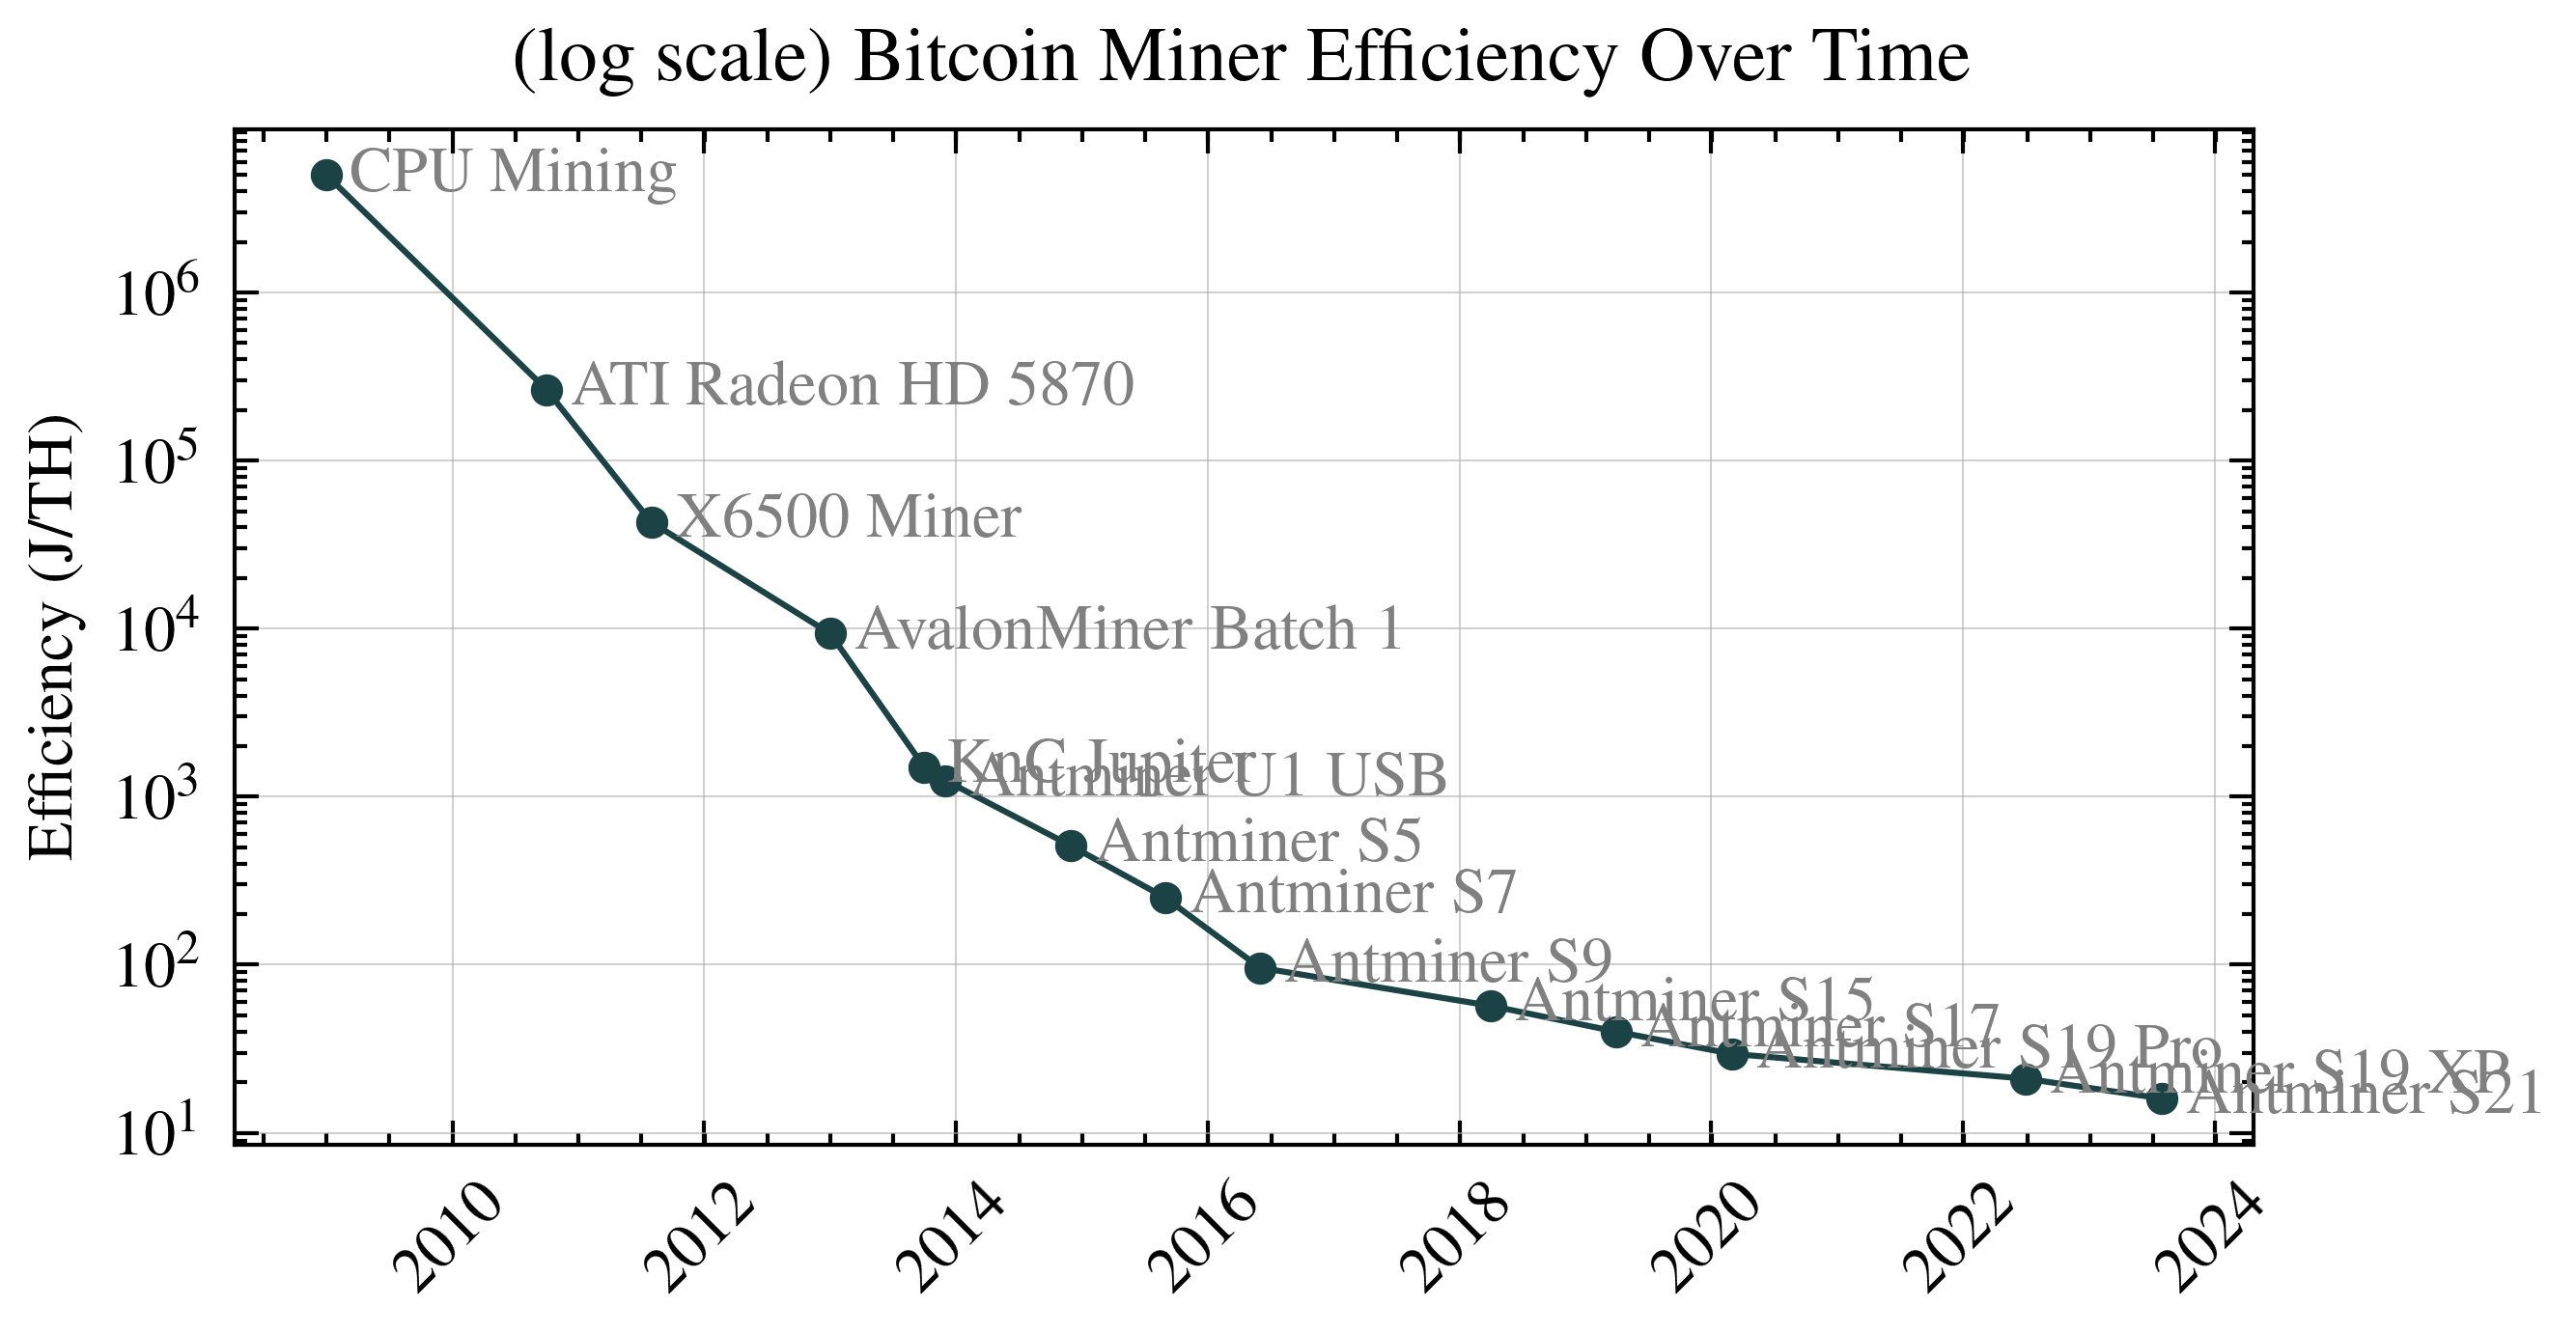

In [4]:
with plt.style.context(['science','ieee']):
    plt.figure(figsize=(4, 2.25))
    plt.grid(True, linestyle='-', alpha=0.7, linewidth=0.2)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.plot(miner_efficiency.index, miner_efficiency['Efficiency (J/TH)'],
                    color=LINE_COLOR, marker='.', linestyle='-', linewidth=0.75)
    for date in miner_efficiency.index:
        y = miner_efficiency.loc[date, 'Efficiency (J/TH)']
        label = miner_efficiency.loc[date, 'Miner Hardware (Manufacturer)'].split(' (')[0].split('– ')[-1]
        plt.annotate(label, 
                    xy=(date, y),
                    xytext=(3, 0),
                    textcoords='offset points',
                    ha='left',
                    color='gray',
                    va='center')
    # Rotate x-axis labels for better readability
    plt.ylabel('Efficiency (J/TH)')
    plt.title('(log scale) Bitcoin Miner Efficiency Over Time')
    plt.yscale('log')
    plt.savefig(ASSETS+'efficiency1.png')
    plt.show()

In [5]:
miner_efficiency.to_csv(OUTPUT+'miner_efficiency.csv')